In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pyarrow import csv
import boost_histogram as bh
from lmfit.models import *
import matplotlib.pyplot as plt

from nicks_plot_utils import *


center_phi = {
    1: -90,
    2: -30,
    3: +30,
    4: +90,
    5: +150,
    6: -150,
  }


In [2]:
file_name = "/Users/tylern/Data/fid_cuts_pip.csv"
pyTable = csv.read_csv(file_name,read_options=csv.ReadOptions(use_threads=True))
df = pyTable.to_pandas(strings_to_categorical=True)

In [3]:
df.head()

,e_sector,e_p,e_theta,e_phi,pip_sector,pip_p,pip_theta,pip_phi
0,4,0.859565,0.696488,-1.737991,1,0.574236,0.199120,1.646595
1,2,0.933202,0.524168,0.413493,2,1.127965,0.165003,0.588484
2,5,1.064455,0.723436,-2.347698,2,1.790597,0.364994,0.298490
3,1,2.424888,0.396139,1.691149,4,0.355232,1.399807,-1.521905
4,4,0.630643,0.616086,-1.564380,1,0.942018,0.407828,1.790410


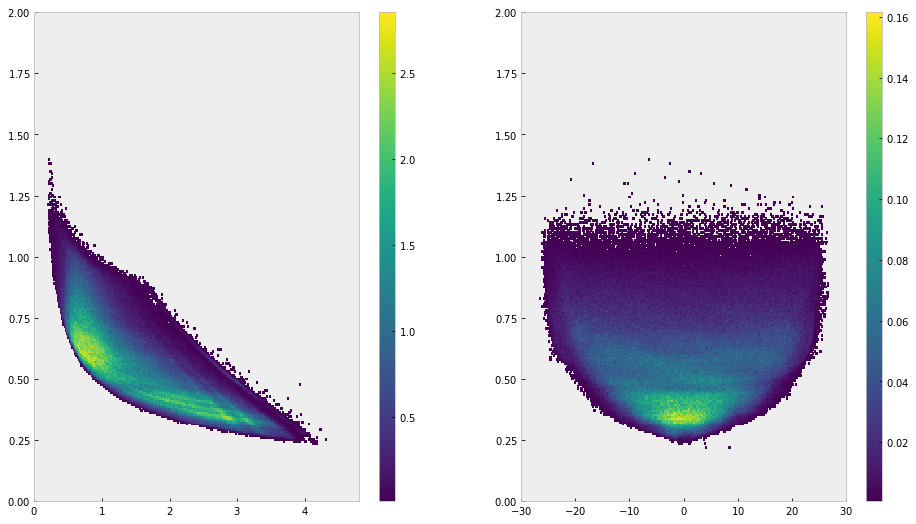

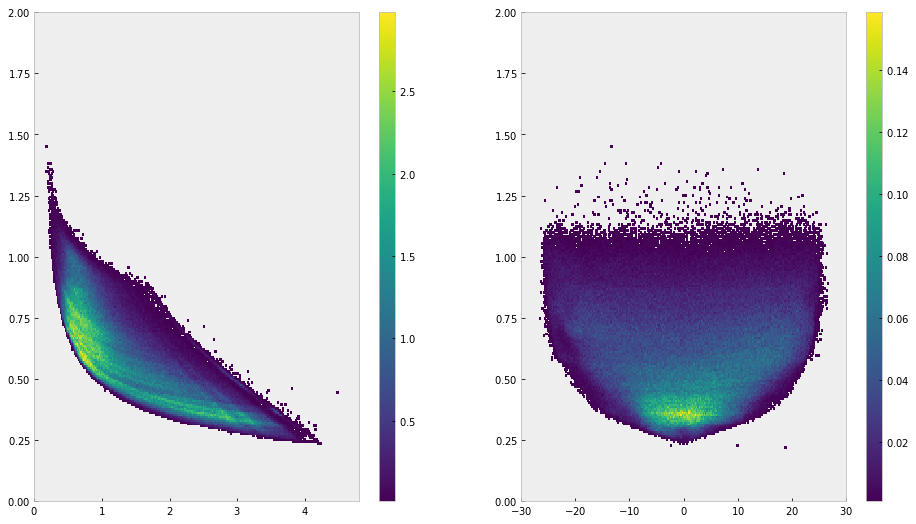

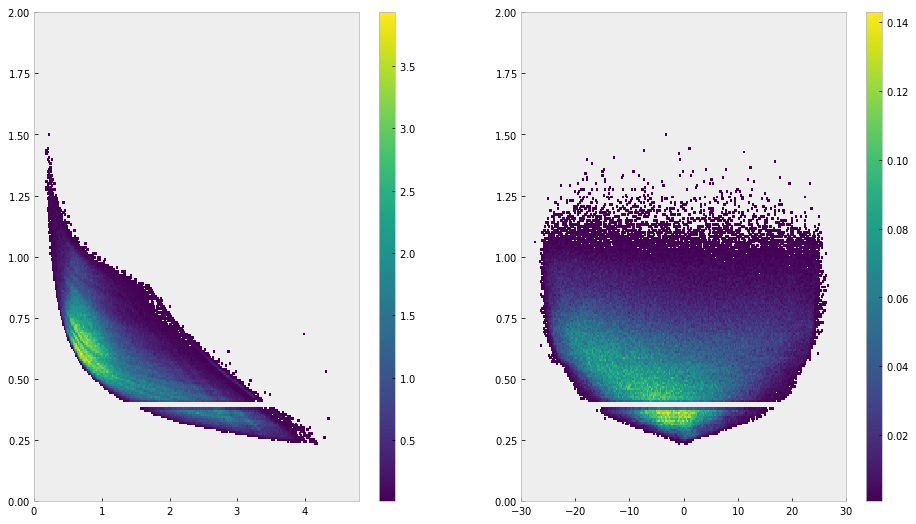

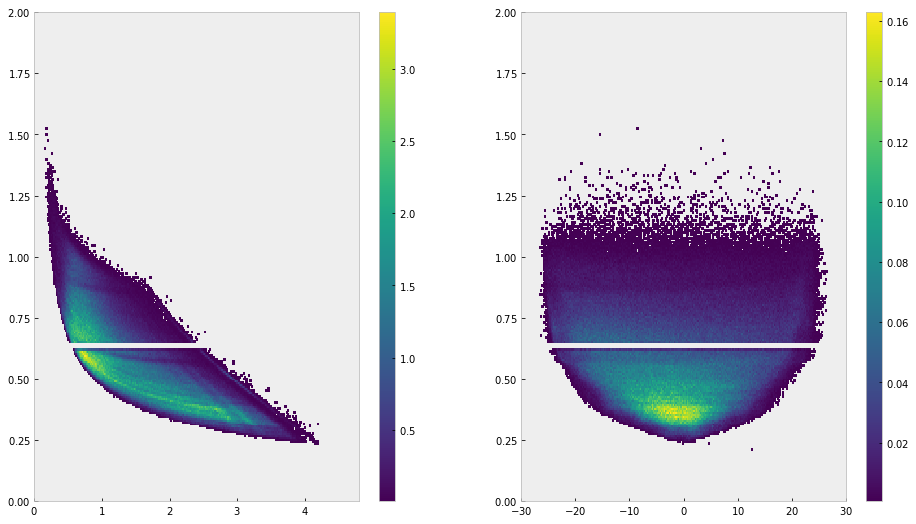

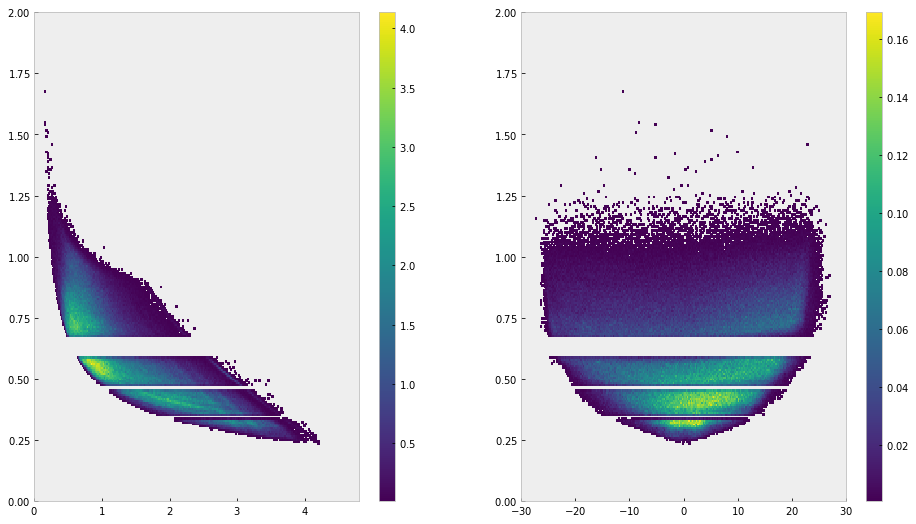

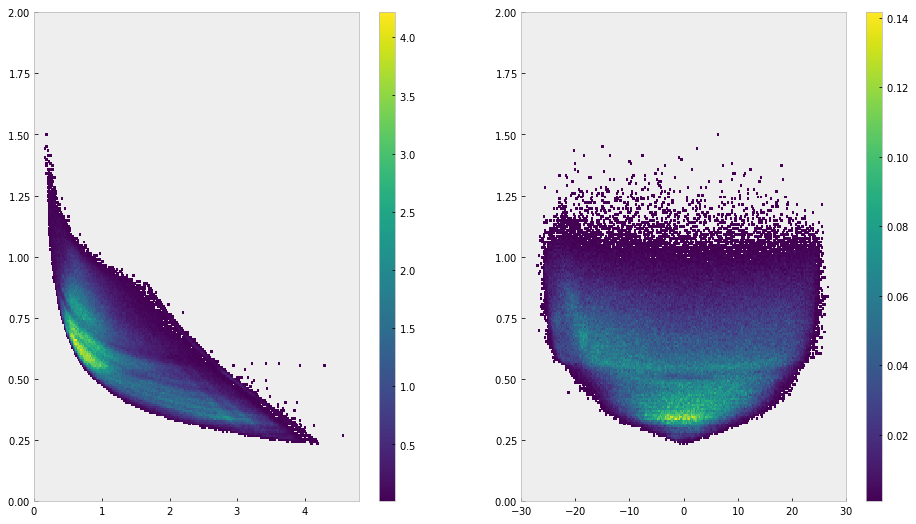

In [4]:
for sec in range(1,7):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
    _df = df[df.e_sector == sec]
    eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=250, ybins=250, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(ax[0], zeros=False)
    
    epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                        xbins=250, ybins=250, xrange=[-30,30], yrange=[0,2])
    epphitheta.plot(ax[1], zeros=False)
    plt.show()

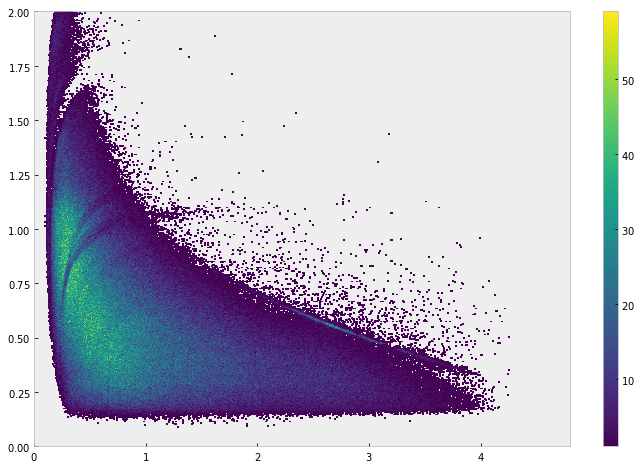

In [7]:
def line(xs, c):
    return c[0] + c[1]*xs + (c[2]/xs) * ( 1-np.exp(-c[3]*( c[4] + c[5]*xs + (c[6]/xs))))

c = np.array([1,1,1,1,1,1,1])

for sec in [1]:
    fig, ax = plt.subplots(figsize=[12,8])
    _df = df[df.pip_sector == sec]
    eptheta = Hist2D(xdata=_df.pip_p, ydata=_df.pip_theta, xbins=500, ybins=500, xrange=[0,4.8], yrange=[0,2])
    eptheta.plot(zeros=False, density=False)
    
    ps = np.linspace(0, 4.8, 500)
    
    # plt.plot(ps, line(ps,c))
    plt.show()

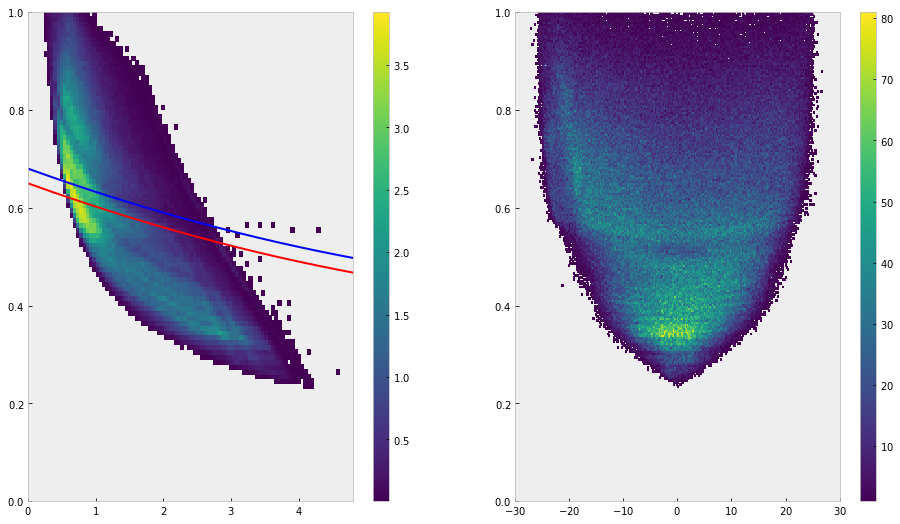

In [8]:
def cut_line(xs, a, b, c, d):
    return a*xs**2 + b*xs + c 

sec = 6
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
_df = df[df.e_sector == sec]

ps = np.linspace(0.001, 4.8, len(_df))

pa=0.0025
pb=-0.05
pc=0.68
pd=0
ax[0].plot(ps,cut_line(ps,pa,pb,pc,pd), c='b')

ma=0.0025
mb=-0.05
mc=0.65
md=0
ax[0].plot(ps, cut_line(ps,ma,mb,mc,md), c='r')

cut = ~(~(_df.e_theta < cut_line(ps,pa,pb,pc,pd)) & ~(_df.e_theta > cut_line(ps,ma,mb,mc,md)))

_df = _df[cut]


eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=100, ybins=100, xrange=[0,4.8], yrange=[0,1])
eptheta.plot(ax[0], zeros=False)

epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                    xbins=250, ybins=250, xrange=[-30,30], yrange=[0,1])
epphitheta.plot(ax[1], density=False, zeros=False)
plt.show()


plt.show()

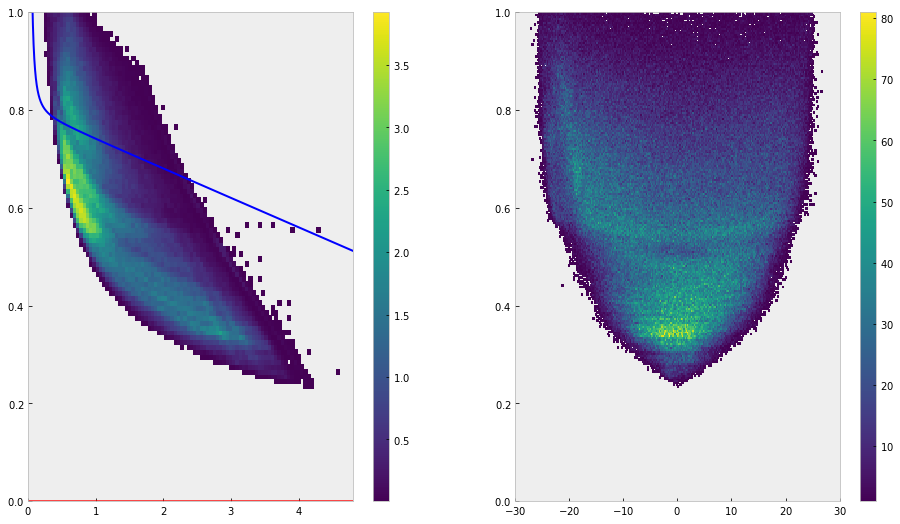

In [36]:
def line(xs, c):
    return c[0] + c[1]*xs + (c[2]/xs) * ( 1-np.exp(-c[3]*( c[4] + c[5]*xs + (c[6]/xs))))

sec = 6
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,9])
_df = df[df.e_sector == sec]

ps = np.linspace(0.001, 4.8, len(_df))

c1 = [0.8, -0.06, 0.1, 0.1, 0.01, 0.01, 0.1]
ax[0].plot(ps, line(ps, c1), c='b')

c2 = [0, 0,0,0,0,0,0]
ax[0].plot(ps, line(ps, c2), c='r')

# cut = ~(~(_df.e_theta < cut_line(ps,pa,pb,pc,pd)) & ~(_df.e_theta > cut_line(ps,ma,mb,mc,md)))

# _df = _df[cut]


eptheta = Hist2D(xdata=_df.e_p, ydata=_df.e_theta, xbins=100, ybins=100, xrange=[0,4.8], yrange=[0,1])
eptheta.plot(ax[0], zeros=False)

epphitheta = Hist2D(xdata=np.rad2deg(_df.e_phi)+center_phi[sec], ydata=_df.e_theta, 
                    xbins=250, ybins=250, xrange=[-30,30], yrange=[0,1])
epphitheta.plot(ax[1], density=False, zeros=False)

ax[0].set_ylim(0,1)


plt.show()